In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read('../data/adata_lung.h5ad')

In [6]:
adata_sub = sc.read('../data/adata_lung_subsampled.h5ad')

In [5]:
adata.obs.dataset.unique()

['Sanger_Meyer_2019Madissoon', 'Vanderbilt_Kropski_bioRxivHabermann_vand', 'CNRS_Barbry_bioRxivDeprez', 'Pittsburgh_Lafyatis_2019Morse_10Xv2', 'NJH_Seibold_2020Goldfarbmuren_10Xv3', ..., 'UMCG_Nawijn_2019VieiraBraga', 'NJH_Seibold_2020Goldfarbmuren_10Xv2', 'Northwestern_Misharin_2018Reyfman', 'Vanderbilt_Kropski_bioRxivHabermann_dna', 'Pittsburgh_Lafyatis_2019Morse_10Xv1']
Length: 13
Categories (13, object): ['Sanger_Meyer_2019Madissoon', 'Vanderbilt_Kropski_bioRxivHabermann_vand', 'CNRS_Barbry_bioRxivDeprez', 'Pittsburgh_Lafyatis_2019Morse_10Xv2', ..., 'NJH_Seibold_2020Goldfarbmuren_10Xv2', 'Northwestern_Misharin_2018Reyfman', 'Vanderbilt_Kropski_bioRxivHabermann_dna', 'Pittsburgh_Lafyatis_2019Morse_10Xv1']

In [13]:
adata.obs.groupby('dataset').size()

dataset
CNRS_Barbry_bioRxivDeprez                   75207
Misharin_new                                28311
NJH_Seibold_2020Goldfarbmuren_10Xv2         12127
NJH_Seibold_2020Goldfarbmuren_10Xv3         21466
Northwestern_Misharin_2018Reyfman           38475
Pittsburgh_Lafyatis_2019Morse_10Xv1          2657
Pittsburgh_Lafyatis_2019Morse_10Xv2         19225
Sanger_Meyer_2019Madissoon                  56711
Sanger_Teichmann_2019VieiraBraga            12359
Stanford_Krasnow_bioRxivTravaglini          60993
UMCG_Nawijn_2019VieiraBraga                 18135
Vanderbilt_Kropski_bioRxivHabermann_dna      5712
Vanderbilt_Kropski_bioRxivHabermann_vand    20733
dtype: int64

In [15]:
adata_sub

AnnData object with n_obs × n_vars = 122396 × 2000
    obs: 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'study'

In [ ]:
adata_sub[adata_sub.obs['study']=='Misharin_new'].obs['']

In [10]:
adata[adata.obs['dataset']=='Northwestern_Misharin_2018Reyfman'].obs.groupby(['ann_level_4']).size().sort_values()

ann_level_4
3_Mast cells                           68
3_Proliferating Epithelial Cells      201
Proliferating Macrophage              212
3_Lymphatic EC                        222
3_Dendritic cells                     314
Multiciliated                         334
3_Secretory                           386
2_Blood vessels                       569
3_Monocytes                          1313
AT1                                  1486
Not alveolar macrophages             1702
Alveolar macrophages                12789
3_AT2                               18879
dtype: int64

In [11]:
adata[adata.obs['dataset']=='Misharin_new'].obs.groupby(['ann_level_4']).size().sort_values()

ann_level_4
3_Monocytes                                6
2_Mesothelium                              9
3_SC89_C11_Mesothelial_2_DEFB4A           10
DC1                                       11
Neuroendocrine                            11
Capillary A EC                            13
3_SC88_C22_SMC                            14
3_SC89_C8_SM                              22
SC89_C7_Fibroblast_7                      23
3_Fibroblasts                             32
SC86_C22_Fibroblast_WIF1_CHRM2_1          34
Plasma cells                              42
SC89_C6_Fibroblast_6_CPXM1                49
SC89_C5_Fibroblast_5_CNTFR                51
SC86_C21_Subpleural_fibroblasts_HAS1      53
SC89_C4_Fibroblast_4_COL13A1              60
SC89_C2_Fibroblast_3                      67
Ionocyte                                  73
SC89_C1_Fibroblast_2_THBD                 75
SC89_C0_Fibroblast_1_THBS4                90
Serous                                    91
3_SC86_C18_SM_3                          10

<AxesSubplot:ylabel='ann_level_4'>

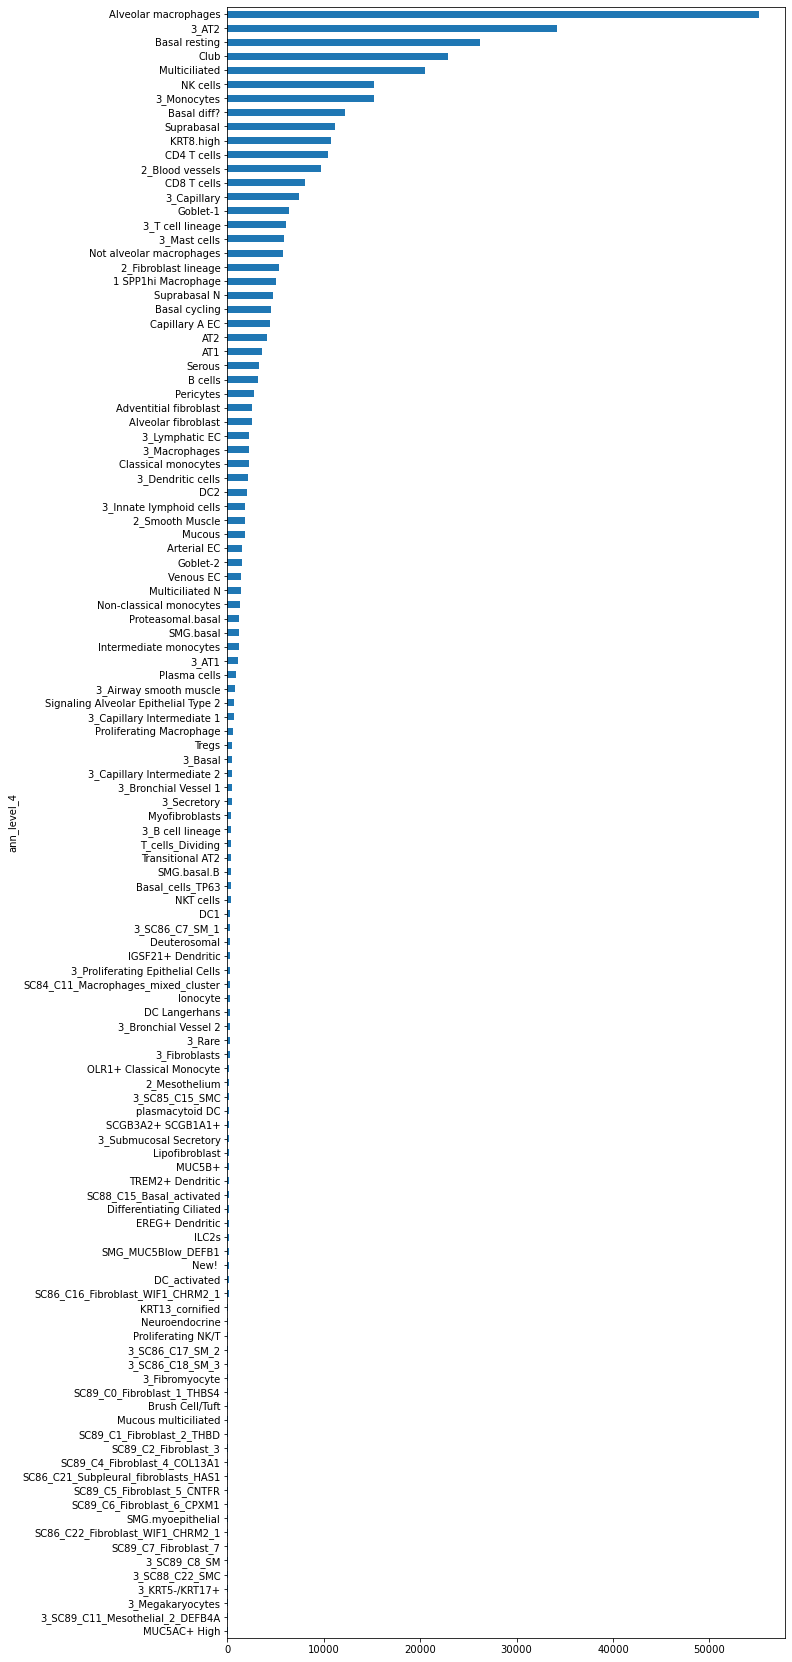

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
adata.obs.groupby('ann_level_4').size().sort_values().plot.barh(ax=ax)

(array([76., 10.,  4.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([8.00000e+00, 1.57680e+03, 3.14560e+03, 4.71440e+03, 6.28320e+03,
        7.85200e+03, 9.42080e+03, 1.09896e+04, 1.25584e+04, 1.41272e+04,
        1.56960e+04, 1.72648e+04, 1.88336e+04, 2.04024e+04, 2.19712e+04,
        2.35400e+04, 2.51088e+04, 2.66776e+04, 2.82464e+04, 2.98152e+04,
        3.13840e+04]),
 <BarContainer object of 20 artists>)

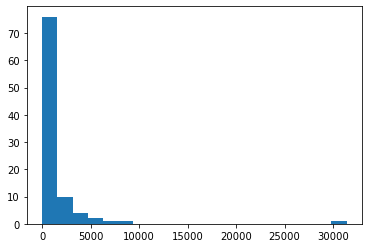

In [8]:
plt.hist(adata.obs.groupby('ann_level_4').size().values, bins=20)

In [11]:
adata.obs.groupby('ann_level_4').size().sort_values().head(40)

ann_level_4
MUC5AC+ High                              8
3_SC89_C11_Mesothelial_2_DEFB4A          10
3_Megakaryocytes                         11
3_KRT5-/KRT17+                           12
3_SC88_C22_SMC                           14
Neuroendocrine                           22
3_SC89_C8_SM                             22
SC89_C7_Fibroblast_7                     23
3_Proliferating Epithelial Cells         26
SC86_C22_Fibroblast_WIF1_CHRM2_1         34
SC89_C6_Fibroblast_6_CPXM1               49
SC89_C5_Fibroblast_5_CNTFR               51
3_B cell lineage                         52
SC86_C21_Subpleural_fibroblasts_HAS1     53
SC89_C4_Fibroblast_4_COL13A1             60
3_Secretory                              60
SC89_C2_Fibroblast_3                     67
SC89_C1_Fibroblast_2_THBD                75
SC89_C0_Fibroblast_1_THBS4               90
Ionocyte                                 95
3_Fibromyocyte                           98
3_SC86_C18_SM_3                         100
Proliferating NK/T  

In [12]:
len(adata.obs['ann_level_4'].cat.categories)

95